<a href="https://colab.research.google.com/github/Arondit/GeneticNeuralNetwork/blob/master/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from random import randint, random
from copy import deepcopy
import matplotlib.pyplot as plt

In [0]:
class NeuralNetworkClassifier:
    def __init__(self,layers_counts,bias=True,act_function='tanh'):
        self.__layers=list()
        if bias: self.__bias = np.random.random_sample(len(layers_counts)-1)*10**-3
        for i in range(len(layers_counts)-1):
            self.__layers.append(np.random.random_sample([layers_counts[i+1],layers_counts[i]])*10**-2)
        self.__layers = np.array(self.__layers)
        if act_function=='tanh': 
          self.act_function = np.tanh
        if act_function=='sigmoid': 
          self.act_function = lambda x: 1/(1+np.exp(-x))
        if act_function=='relu': 
          self.act_function = lambda x: max(0.1*x,x)
    @property
    def layers(self):
        return self.__layers
    @property
    def bias(self):
        return self.__bias
    def set_layers(self,new_weights):
        self.__layers = np.array(new_weights)
    def set_weight(self, axys,weight):
        self.__layers[axys[0]][axys[1]][axys[2]] = weight
    def set_one_bias(self, ind, new_bias):
        self.__bias[ind]=new_bias
    def set_bias(self,new_bias):
        self.__bias = np.array(new_bias)
    def predict(self,X):
        res = np.zeros(len(X))
        for i,x in enumerate(X):
            values = deepcopy(x)
            for j,layer in enumerate(self.layers):
                #print(values)
                values = np.dot(layer,values)+self.bias[j]
                values = self.act_function(values)
            res[i] = np.argmax(values)
        return res
    def predict_proba(self,X):
        res = np.zeros(len(X))
        for i,x in enumerate(X):
            values = np.array(x)
            for j,layer in enumerate(self.layers):
                values = np.dot(layer,values)+self.bias[j]
                values = self.act_function(values)
            res[i] = np.max(values)
        return res
    def accuracy(self,X,y):
        y_p = self.predict(X)
        res=0
        for i, p in enumerate(y_p):
            if p==y[i]: res+=1
        return res/len(y)


In [0]:
def parent(distr):
    rt = randint(0,10000)
    if rt<distr[0]: return 0
    for i in range(1,len(distr)):
        if distr[i-1]<rt<distr[i]:
            return i  

def generate(X,y,*,layers_counts, population_count = 8, needed_accuracy = 0.9,epochs=10000,mutant_rate=0.5):
    variants = [NeuralNetworkClassifier(layers_counts) for i in range(population_count)]
    survival_coeffs = []
    mistakes=[]
    bin = lambda: randint(0,1)
    E=[]
    results=[]
    for e in range(epochs):
        mistakes = [1-nn.accuracy(X,y) for nn in variants]
        sum = 0.0
        for m in range(population_count):
            if mistakes[m] <= 1-needed_accuracy: return variants[m]
            sum += 1/mistakes[m]
        survival_coeffs = np.array([int((1/m)/sum*10000) for m in mistakes])
        distr = [0 for i in range(population_count)]
        distr[0] = survival_coeffs[0]
        for i in range(1, len(survival_coeffs)):
            distr[i] = distr[i-1] + survival_coeffs[i]
        parents = []
        for i in range(population_count):
            first = parent(distr)
            while first is None: 
                first = parent(distr)
            second = first
            while second == first:
                second = parent(distr)
                while second is None: 
                    second = parent(distr)
            parents.append((first,second))
        
        bests = []
        s = variants[np.argmax(survival_coeffs)]
        bests.append(s)
        if population_count>14:
          for i in range(1,int(population_count/14)+1):
            indbest=0
            for j,nn in enumerate(variants):
              if survival_coeffs[j]>survival_coeffs[indbest] and nn not in bests: indbest=j
            bests.append(variants[indbest])
        new_variants = []
        for i in range(population_count):
            first = variants[parents[i][0]]
            second = variants[parents[i][1]]
            both = (first,second)
            res = NeuralNetworkClassifier(layers_counts)
            for a in range(len(res.layers)):
                for b in range(len(res.layers[a])):
                    for c in range(len(res.layers[a][b])):
                        res.set_weight([a,b,c],both[bin()].layers[a][b][c]+bin()*bin()*bin()*bin()*random()*mutant_rate*(-1)**bin())
            for a in range(len(first.bias)):
                res.set_one_bias(a,both[bin()].bias[a]+bin()*bin()*bin()*random()*mutant_rate*(-1)**bin())
            new_variants.append((deepcopy(res)))
        variants=new_variants
        worsts=[]
        worsts.append(np.argmax(mistakes))
        if population_count>14:
          for i in range(1,int(population_count/14)+1):
            indworst=0
            for j,nn in enumerate(variants):
              if survival_coeffs[j]<survival_coeffs[indworst] and j not in worsts: indworst=j
            worsts.append(indworst)
        for k,nn in enumerate(bests):
          variants[worsts[k]]=nn
        else: variants[np.argmax(mistakes)]=s
        E.append(e)
        results.append(1-np.min(mistakes))
        print(e,': ',1-np.min(mistakes))
    plt.plot(results)
    plt.show()
    return s


In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits['data'], digits['target']

In [0]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)
X_train = X[:1200]
X_test = X[1200:]
y_train = y[:1200]
y_test = y[1200:]

0 :  0.12583333333333335
1 :  0.13250000000000006
2 :  0.17999999999999994
3 :  0.17999999999999994
4 :  0.17999999999999994
5 :  0.17999999999999994
6 :  0.17999999999999994
7 :  0.17999999999999994
8 :  0.17999999999999994
9 :  0.17999999999999994
10 :  0.17999999999999994
11 :  0.1808333333333334
12 :  0.2516666666666667
13 :  0.2516666666666667
14 :  0.2516666666666667
15 :  0.2516666666666667
16 :  0.2516666666666667
17 :  0.2516666666666667
18 :  0.2516666666666667
19 :  0.2516666666666667
20 :  0.2516666666666667
21 :  0.2516666666666667
22 :  0.2516666666666667
23 :  0.2516666666666667
24 :  0.2516666666666667
25 :  0.2516666666666667
26 :  0.2516666666666667
27 :  0.2516666666666667
28 :  0.2516666666666667
29 :  0.2516666666666667
30 :  0.2516666666666667
31 :  0.2516666666666667
32 :  0.2516666666666667
33 :  0.2516666666666667
34 :  0.2516666666666667
35 :  0.2516666666666667
36 :  0.2516666666666667
37 :  0.2516666666666667
38 :  0.2516666666666667
39 :  0.2516666666666667

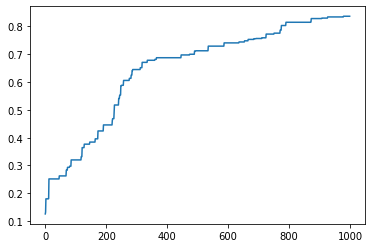

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
0.6800670016750419


In [48]:
clf = generate(X_train,y_train,layers_counts=[64,48,32,16,10],epochs=1000,population_count=43,mutant_rate=0.1)
%time
print(clf.accuracy(X_test,y_test))

In [0]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,clf.predict(X_test))
clf.layers

In [0]:
!pip install python-mnist
!mkdir dir_with_mnist_data_files
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!mv train-images-idx3-ubyte.gz dir_with_mnist_data_files
!mv train-labels-idx1-ubyte.gz dir_with_mnist_data_files

In [0]:
from mnist import MNIST
from matplotlib import pyplot as plt
mndata = MNIST('./dir_with_mnist_data_files', gz=True)
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)

In [0]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(images)
X_train = X[:20000]
X_test = X[20000:]
y_train = labels[:20000]
y_test = labels[20000:]

In [0]:
clf = generate(X_train,y_train,layers_counts=[784,196,49,10],epochs=600,population_count=12,mutant_rate=0.1)
%time
print(clf.accuracy(X_test,y_test))

In [0]:
for i in range(15):
  clf1 = NeuralNetworkClassifier(layers_counts=[784,196,49,10])
  print(clf1.accuracy(X_test,y_test))